In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import wordnet
from collections import  Counter

from sklearn import preprocessing


import matplotlib as mpl
import matplotlib.pyplot as plt      
import math

from sklearn.preprocessing import normalize


import seaborn as sns
from sklearn.decomposition import PCA
from wordcloud import WordCloud

import ipywidgets as widgets

sns.set(color_codes=True)
from matplotlib import rcParams
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [2]:
df=pd.read_csv('After_text_analysis.csv')


In [3]:
df.columns

Index(['book_name', 'book_series', 'book_series_number', 'authorName',
       'description', 'pages', 'rating', 'rating_Count', 'reviews_Count',
       'ISBN13', 'published_year', 'published_month', 'Rating5', 'Rating4',
       'Rating3', 'Rating2', 'Rating1', 'Rating5_Percent', 'Rating4_Percent',
       'Rating3_Percent', 'Rating2_Percent', 'Rating1_Percent', 'people_liked',
       'dark', 'even', 'ever', 'family', 'find', 'first', 'life', 'love',
       'magic', 'man', 'must', 'never', 'new', 'old', 'power', 'time', 'war',
       'world', 'years', 'young', 'popular_words'],
      dtype='object')

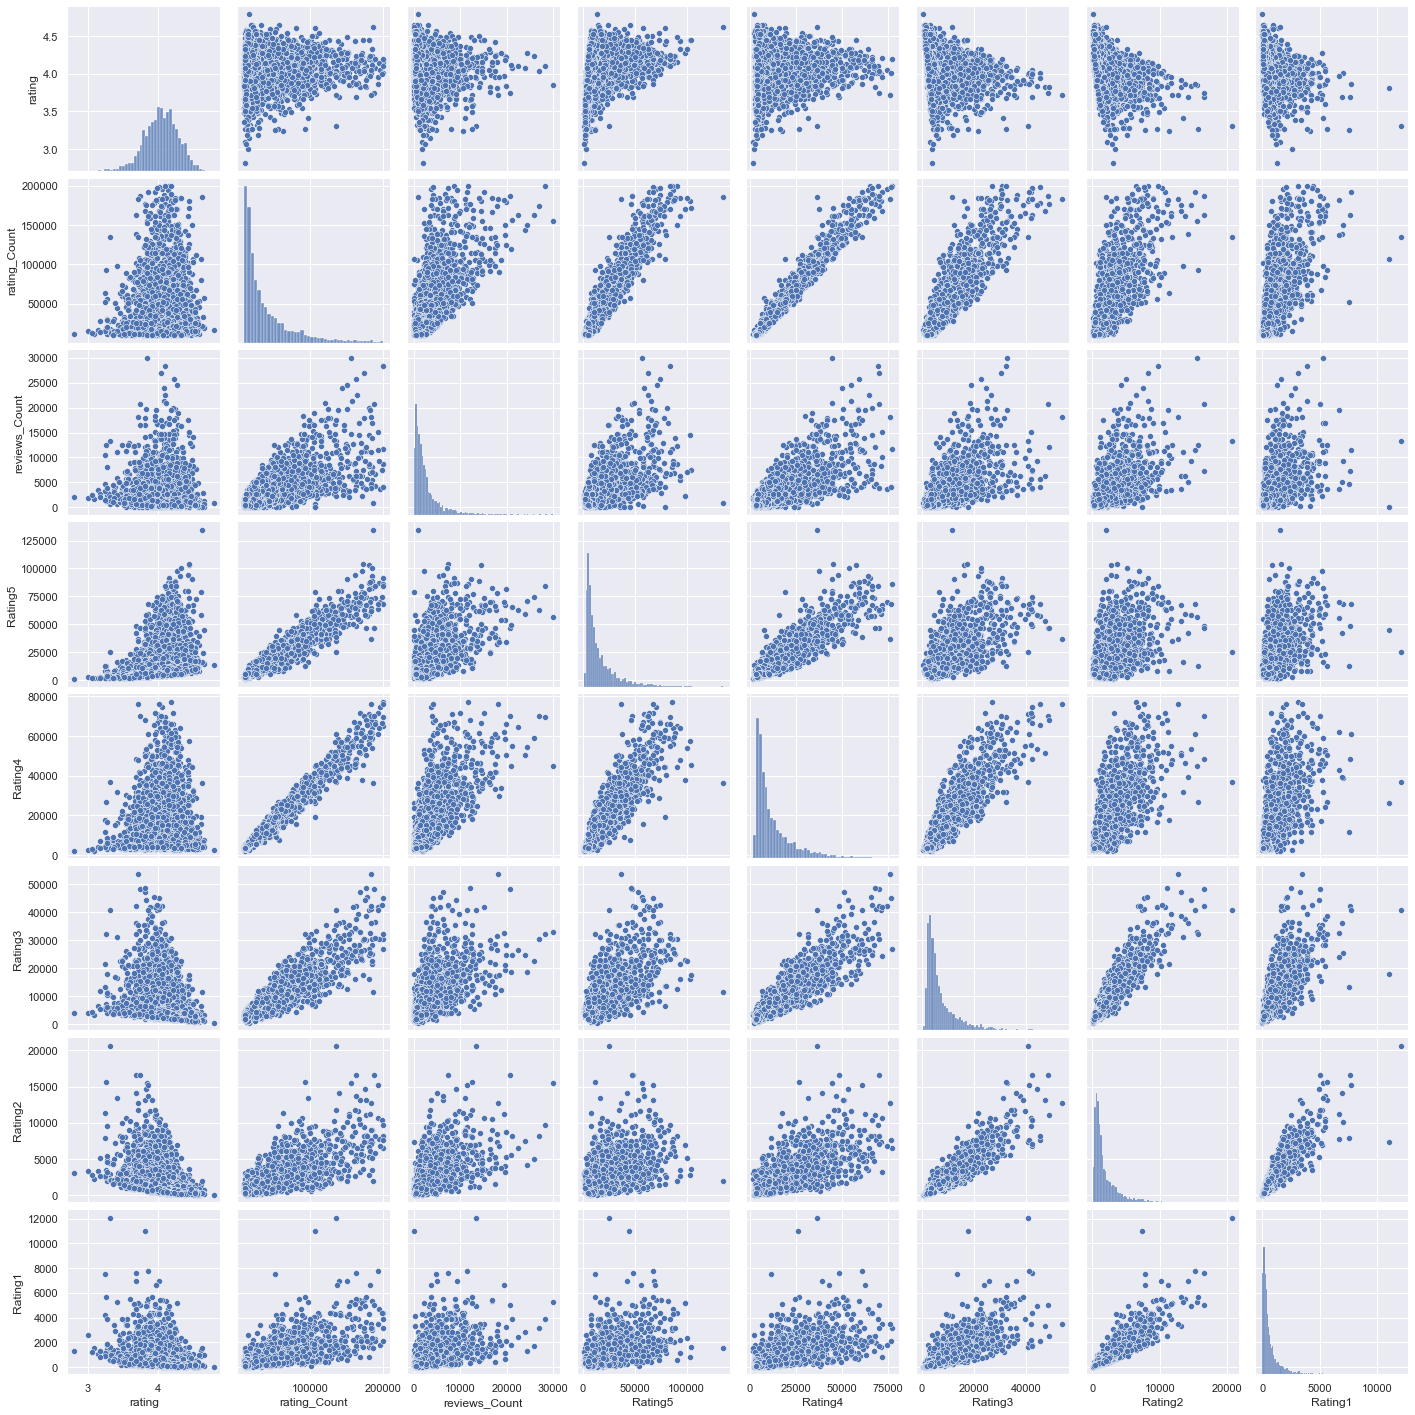

In [4]:
sns.pairplot(df[['rating', 'rating_Count', 'reviews_Count',
                 'Rating5', 'Rating4','Rating3', 'Rating2', 'Rating1']])

we can see that the "Rating 1" correlate 
with "Rating 2"

we can see that the "Rating 2" correlate 
with "Rating 3"

we can see that the "Rating 3" correlate 
with "Rating 4"

we can see that the "Rating 4" correlate 
with "Rating 5"

but there not correlation between "Rating 1" and "Rating 5"

and that because 
book that is good will get from most people the same score of 5-4-3

most of the time 4 we can see that by how much it correlate with

"rating_Count" almost a straight line

and

book that is less good by people opinion will get from most people the same score of 1-2-3

and the same goes for mediocre

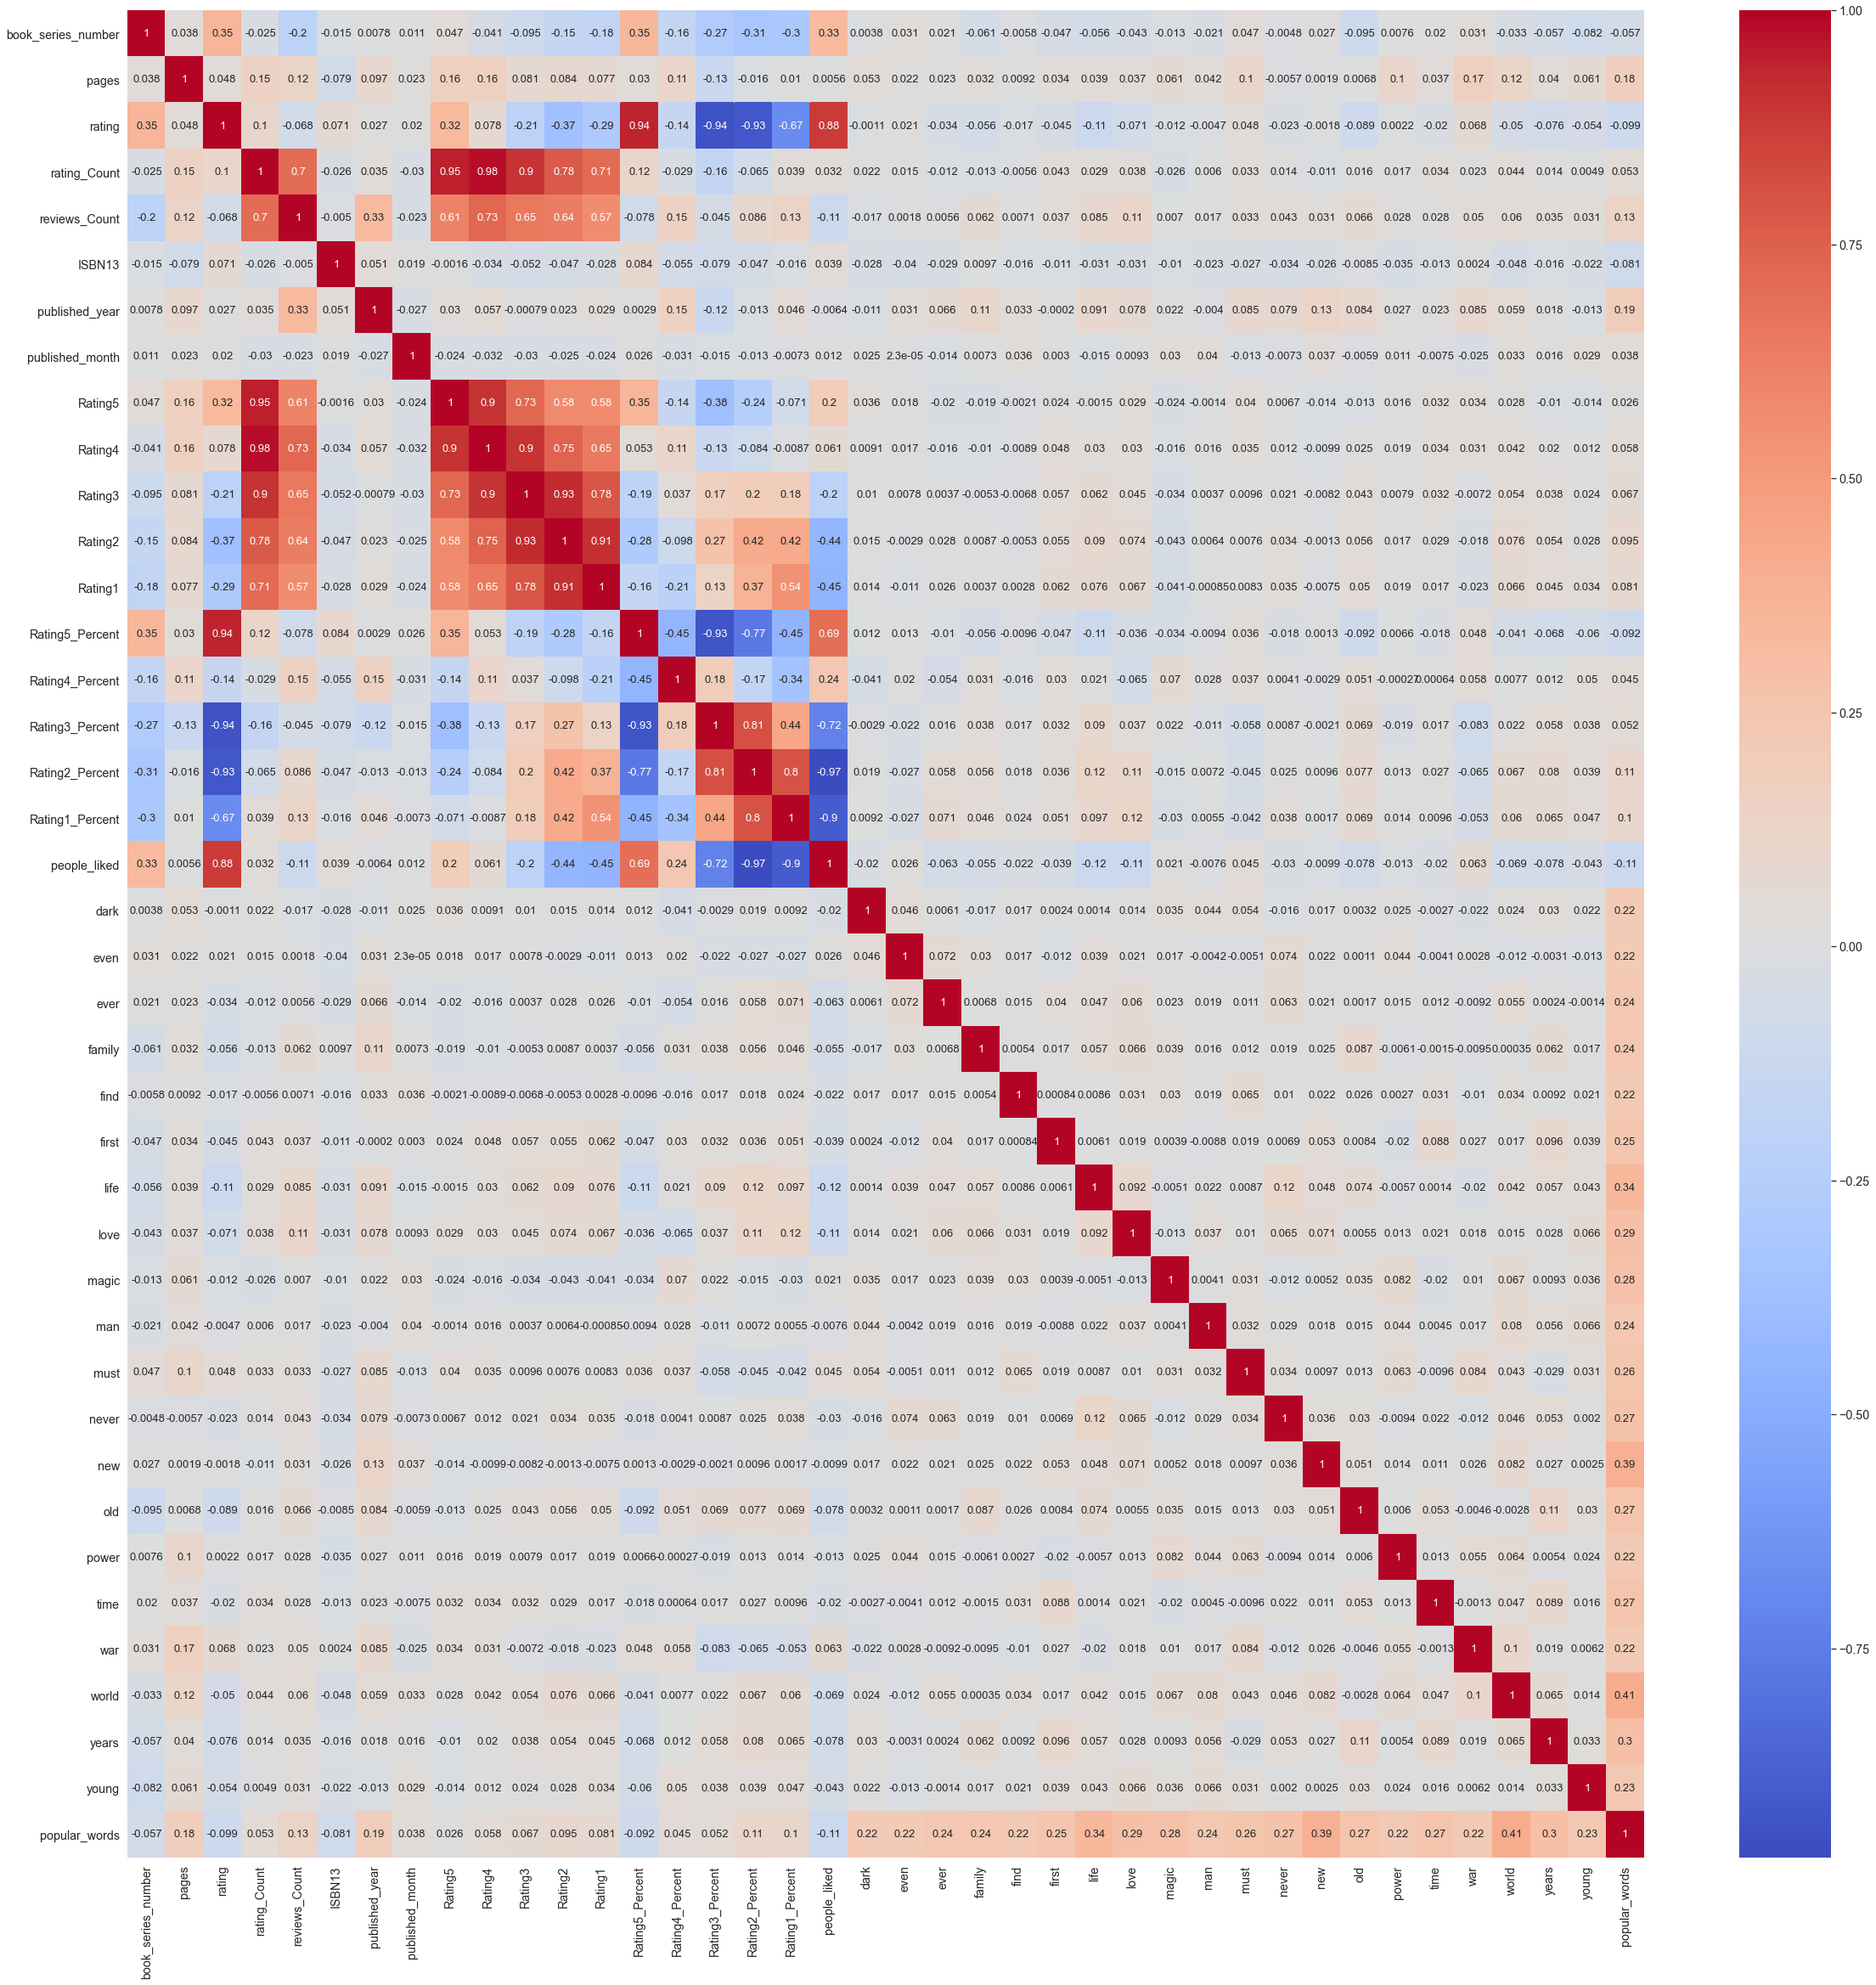

In [19]:
f, ax = plt.subplots(figsize=(40, 40))
corrMatrix = df.corr() 
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm',annot_kws={'fontsize':13})
plt.show()

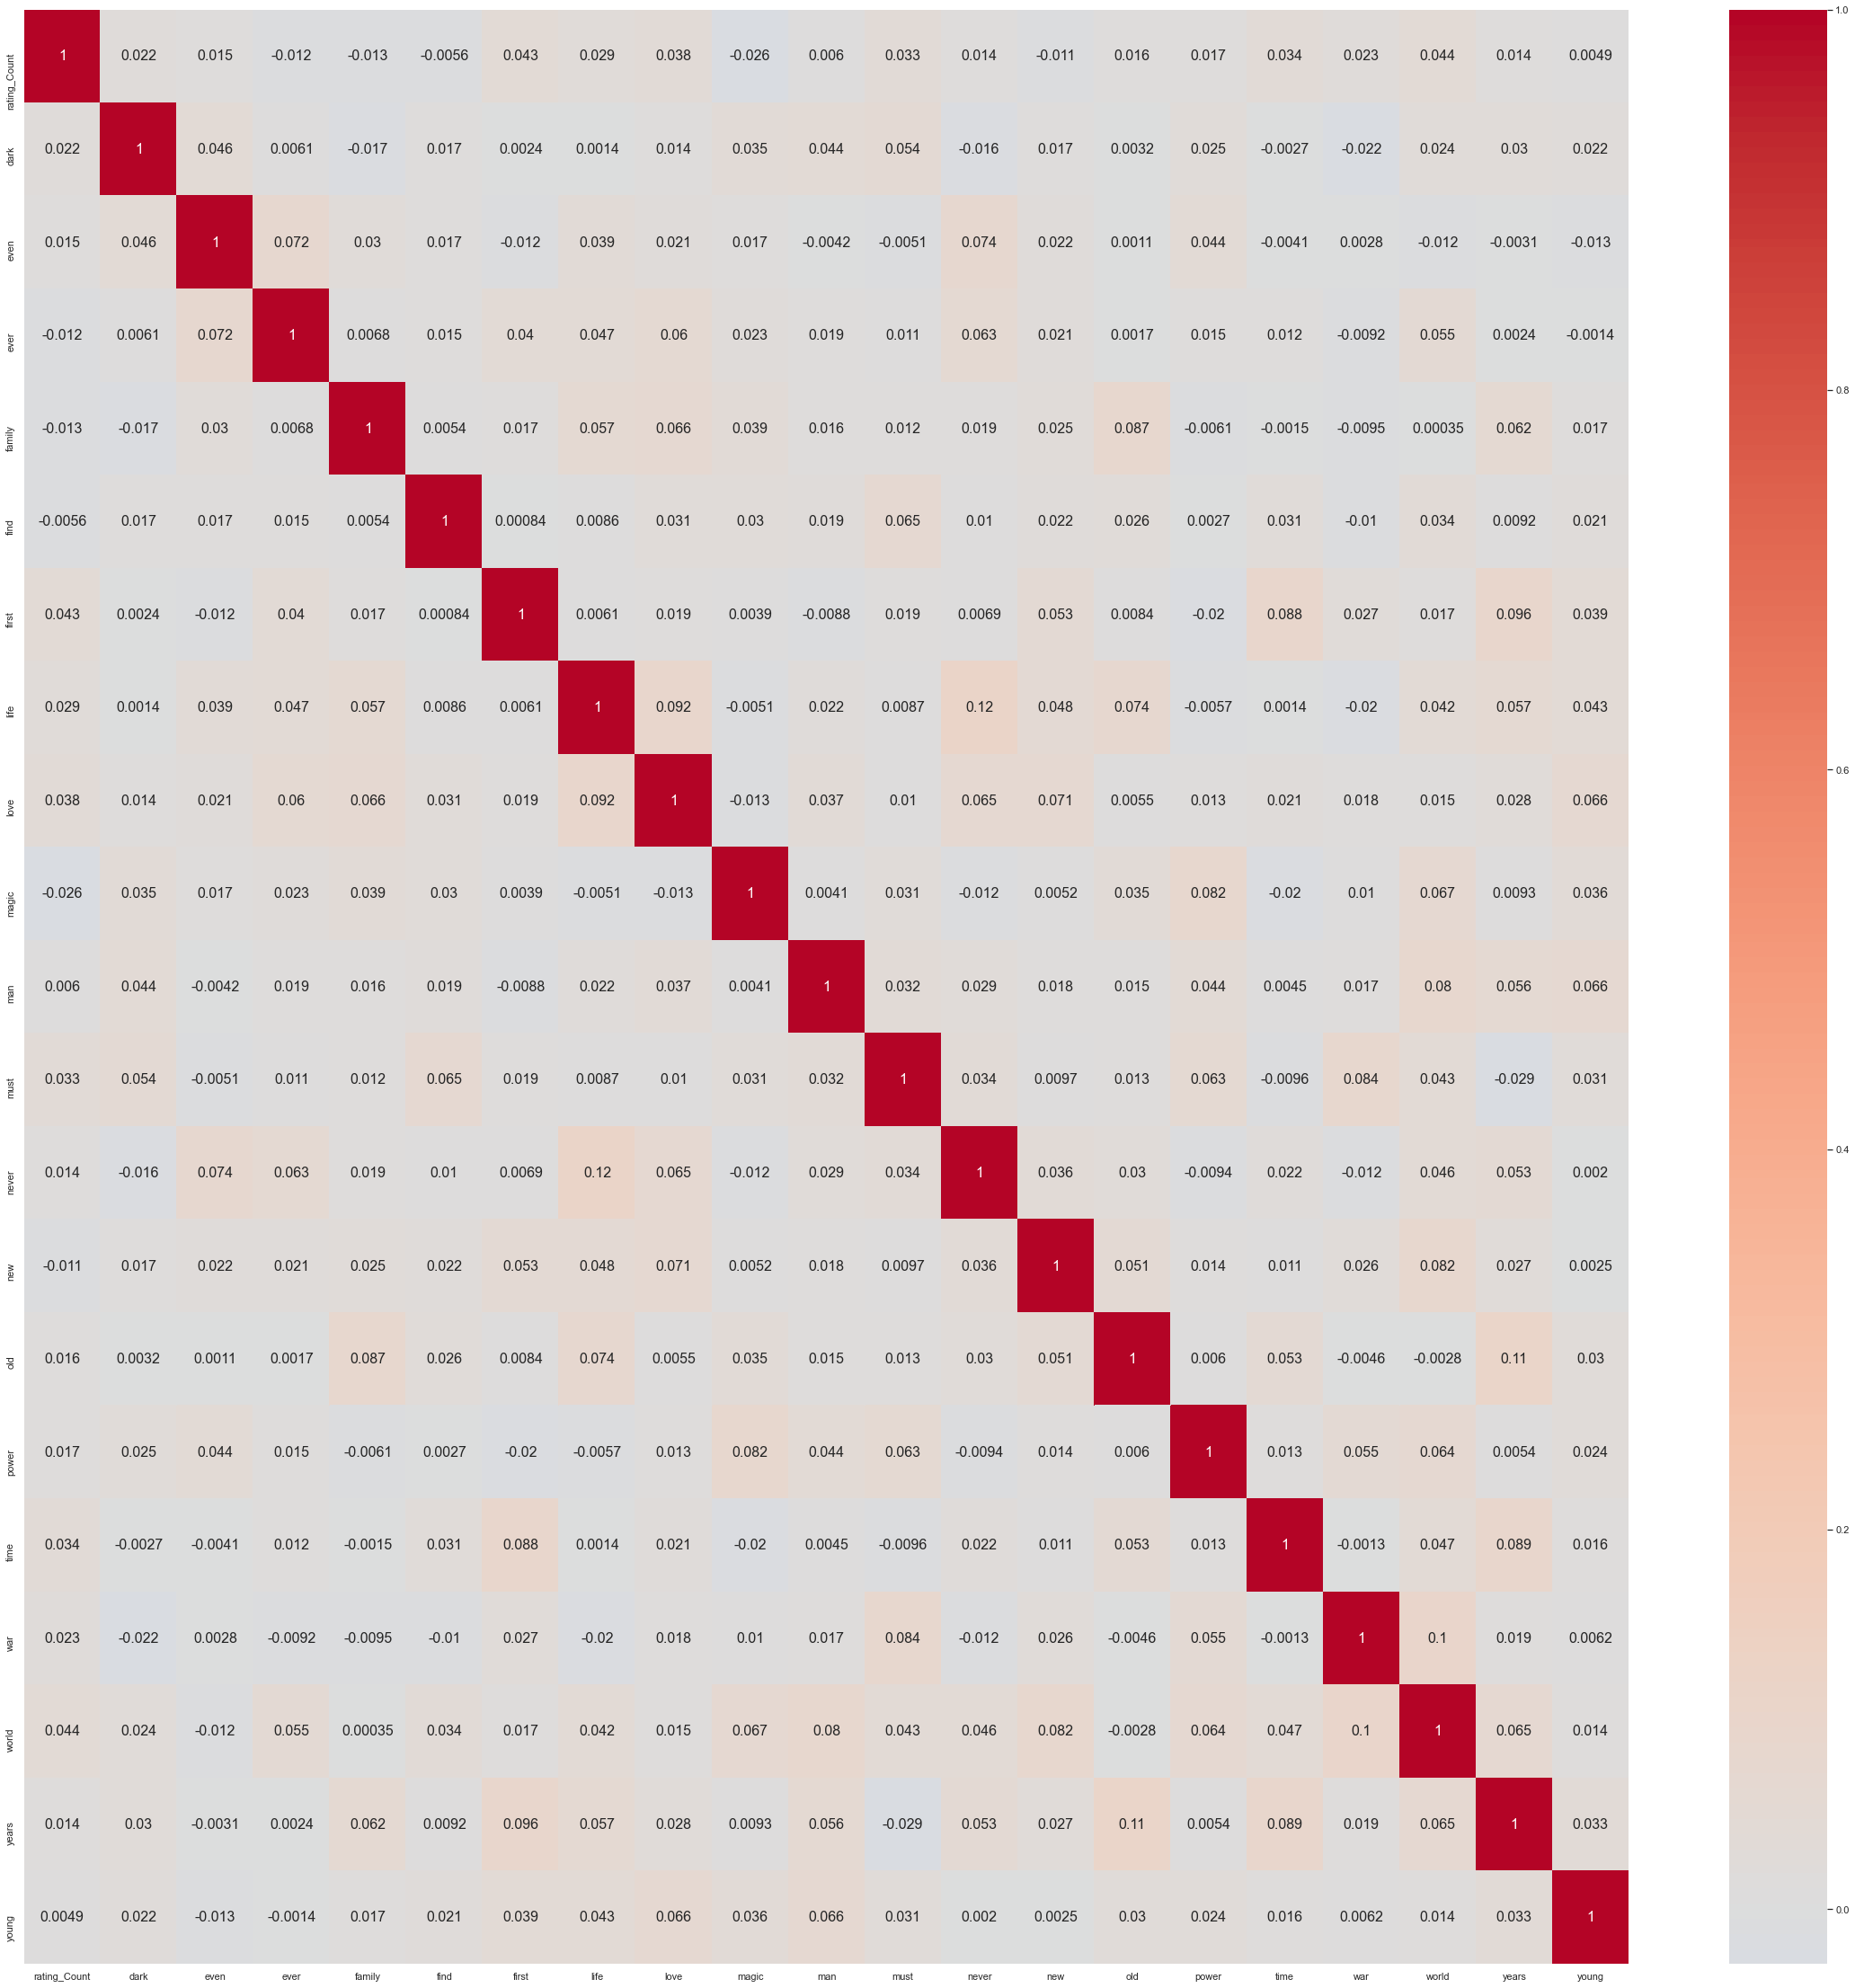

In [6]:
f, ax = plt.subplots(figsize=(40, 40))
corrMatrix = df[['rating_Count','dark', 'even', 'ever', 'family', 'find', 'first', 'life', 'love',
                 'magic', 'man', 'must', 'never', 'new', 'old', 'power', 'time', 'war','world', 'years', 'young']].corr() 
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm',center=0,annot_kws={'fontsize':16})
plt.show()

In [7]:
df['popular_words'].sum()

23041

## Unfortunately, none of the words correlate with "rating_Count"

### even though there are 23,041 popular words in all the books

### Which makes me think my initial question is wrong

In [8]:
stop_wo=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself',
 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having',
 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by',
 'for', 'with', 'about', 'against','between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from',
 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where',
 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own',
 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll',
 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',
 "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn',
 "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn',
 "wouldn't","book","story","one","two"]

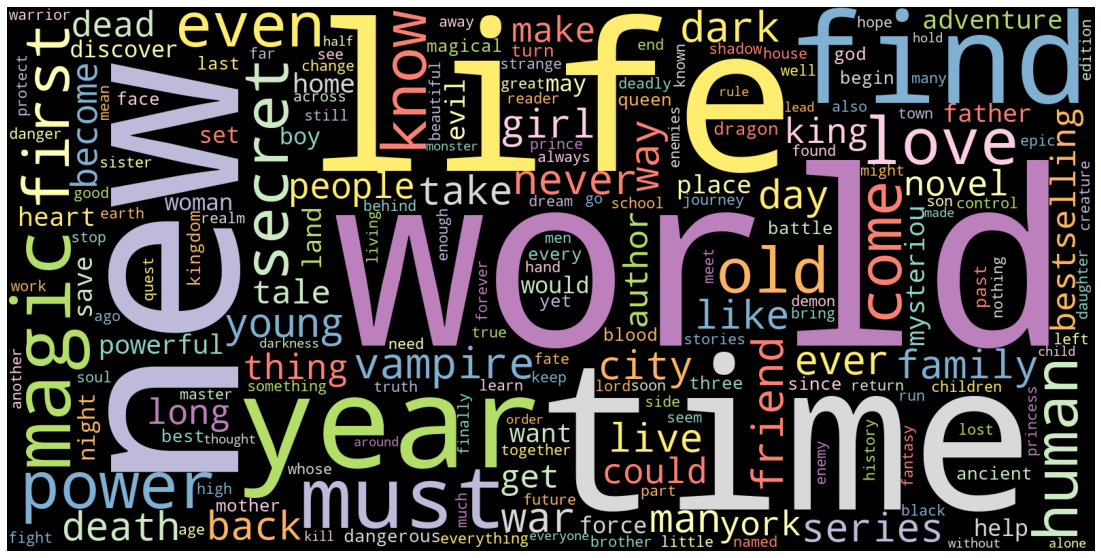

In [9]:
wordcloud = WordCloud(background_color="black",stopwords =stop_wo,width=1600,collocations=False, colormap='Set3', height=800).generate(' '.join(df['description'].tolist()))
plt.figure( figsize=(20,10), facecolor='w')
plt.axis("off")
plt.imshow(wordcloud)

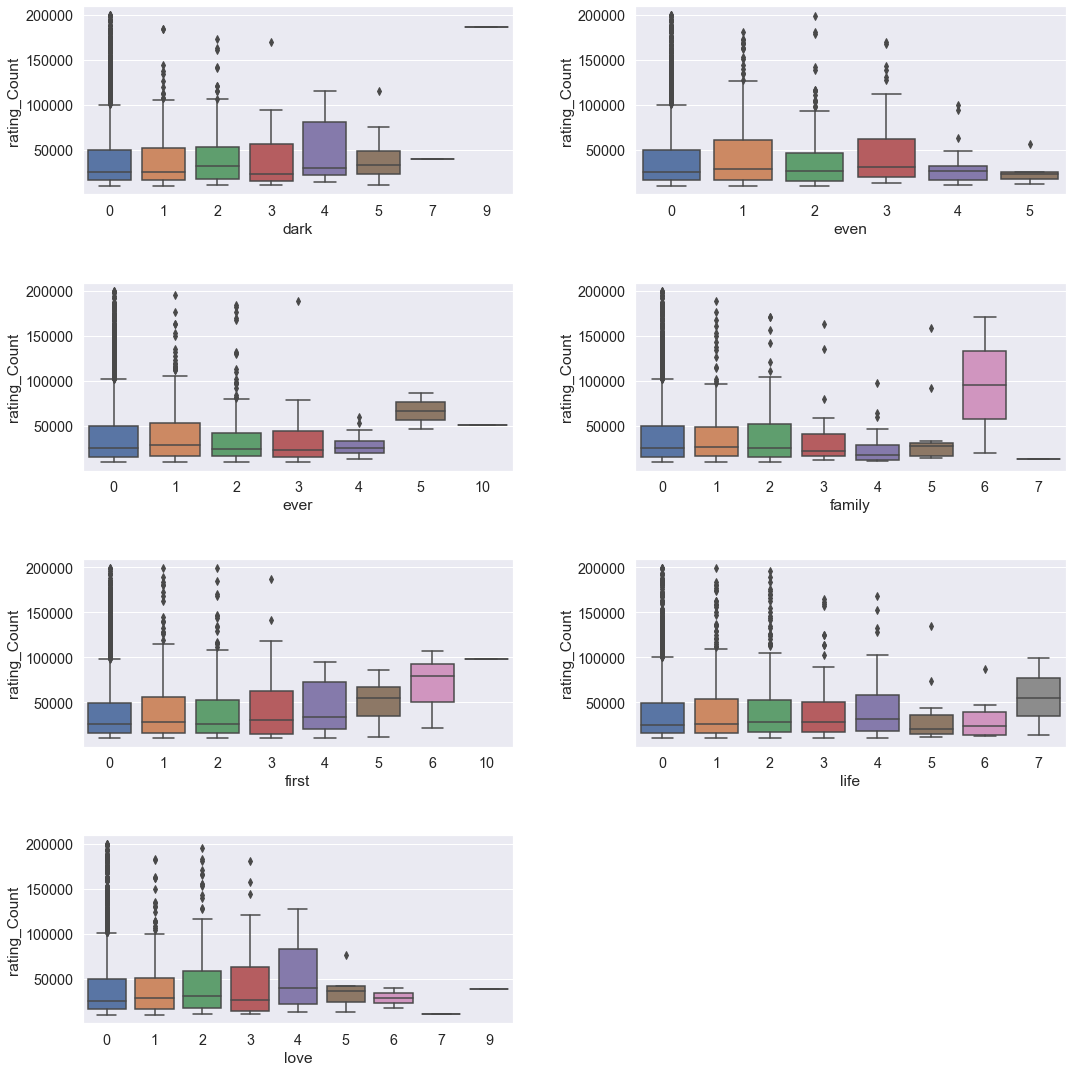

In [10]:
sns.set(font_scale=1.3)
fig,ax=plt.subplots(4,2, figsize=(16, 16))

g = sns.boxplot(y='rating_Count', x="dark", data=df, ax=ax[0,0])
g = sns.boxplot(y='rating_Count', x="even", data=df, ax=ax[0,1])
g = sns.boxplot(y='rating_Count', x="ever", data=df, ax=ax[1,0])
g = sns.boxplot(y='rating_Count', x="family", data=df, ax=ax[1,1])
g = sns.boxplot(y='rating_Count', x="first", data=df, ax=ax[2,0])
g = sns.boxplot(y='rating_Count', x="life", data=df, ax=ax[2,1])
g = sns.boxplot(y='rating_Count', x="love", data=df, ax=ax[3,0])

fig.delaxes(ax[3][1])
plt.tight_layout(pad=3.0) #

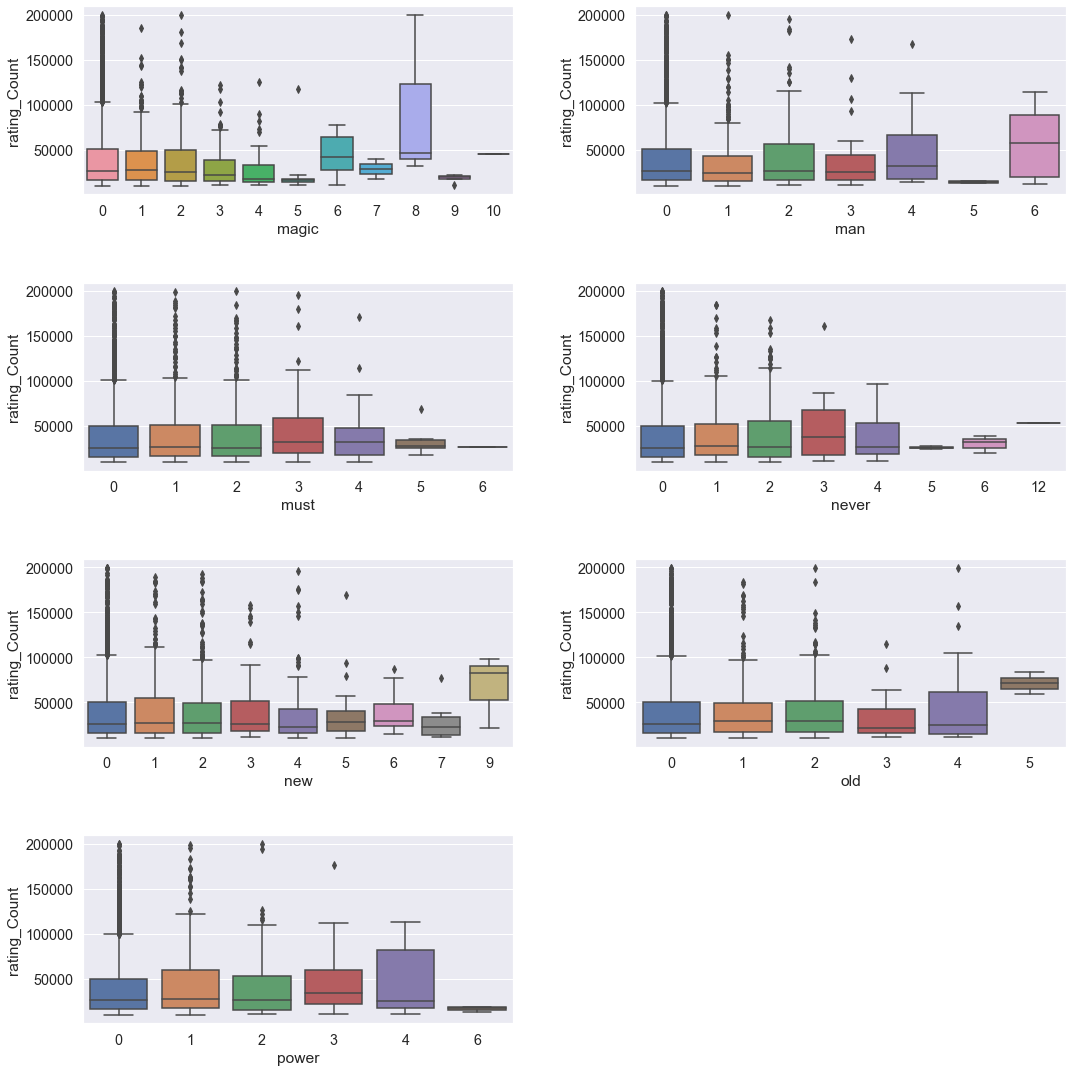

In [11]:
sns.set(font_scale=1.3)
fig,ax=plt.subplots(4,2, figsize=(16, 16))

g = sns.boxplot(y='rating_Count', x="magic", data=df, ax=ax[0,0])
g = sns.boxplot(y='rating_Count', x="man", data=df, ax=ax[0,1])
g = sns.boxplot(y='rating_Count', x="must", data=df, ax=ax[1,0])
g = sns.boxplot(y='rating_Count', x="never", data=df, ax=ax[1,1])
g = sns.boxplot(y='rating_Count', x="new", data=df, ax=ax[2,0])
g = sns.boxplot(y='rating_Count', x="old", data=df, ax=ax[2,1])
g = sns.boxplot(y='rating_Count', x="power", data=df, ax=ax[3,0])

fig.delaxes(ax[3][1])
plt.tight_layout(pad=3.0) #

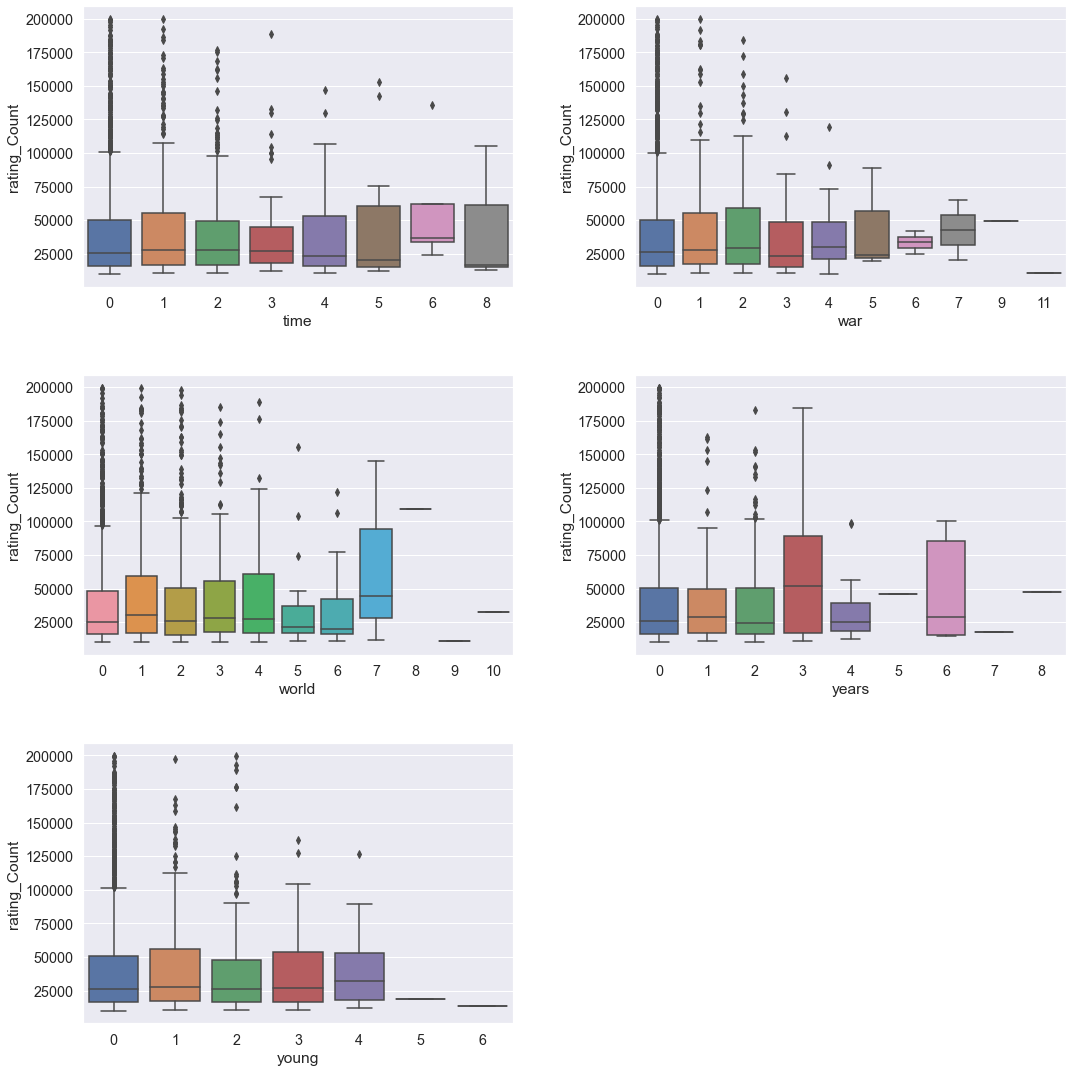

In [12]:
sns.set(font_scale=1.3)
fig,ax=plt.subplots(3,2, figsize=(16, 16))

g = sns.boxplot(y='rating_Count', x="time", data=df, ax=ax[0,0])
g = sns.boxplot(y='rating_Count', x="war", data=df, ax=ax[0,1])
g = sns.boxplot(y='rating_Count', x="world", data=df, ax=ax[1,0])
g = sns.boxplot(y='rating_Count', x="years", data=df, ax=ax[1,1])
g = sns.boxplot(y='rating_Count', x="young", data=df, ax=ax[2,0])


fig.delaxes(ax[2][1])
plt.tight_layout(pad=3.0) #

## from all of this box we can learn that 
## mostly even if the summary of a book doesn't contain one of this words.
## it has just has high chances to have high rating count
### we can see it by loking at the 0 value

In [13]:
list3=['dark', 'even', 'ever', 'family', 'find', 'first', 'life', 'love',
       'magic', 'man', 'must', 'never', 'new', 'old', 'power',
       'time', 'war','world', 'years', 'young']

dfff=df[['dark', 'even', 'ever', 'family', 'find', 'first', 'life', 'love',
                 'magic', 'man', 'must', 'never', 'new', 'old', 'power',
         'time', 'war','world', 'years', 'young']].sum()
df7=pd.DataFrame({'word':list3,'num':dfff})
df7.reset_index(drop=True, inplace=True)


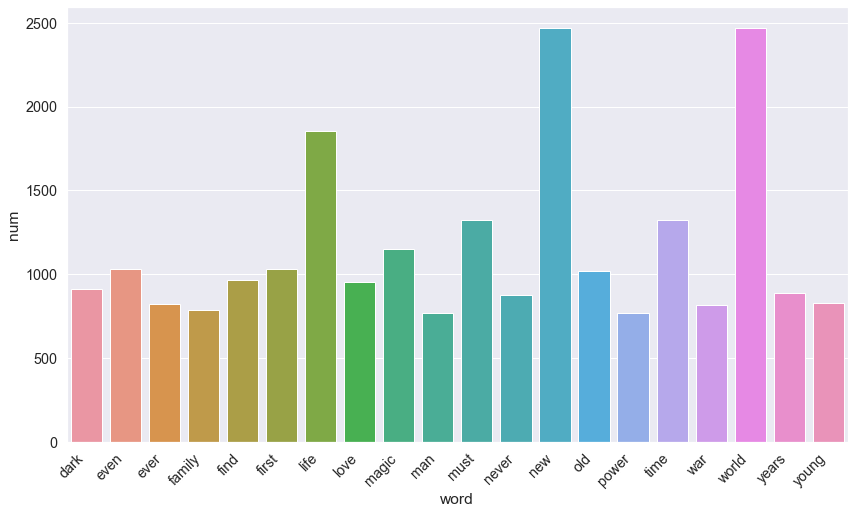

In [14]:
fig,ax = plt.subplots(figsize=(14,8))
fig = sns.barplot(x = 'word',y='num',data=df7, ax=ax)
 
ax.set_xticklabels(labels=df7['word'], rotation=45, ha='right')
plt.show()

In [15]:
df6=df.copy()

In [16]:
df6=df6.drop([ 'power','dark', 'even', 'ever', 'family', 'find', 'first', 'life', 'love',
                 'magic', 'man', 'must', 'never', 'new', 'old', 'time', 'war','world', 'years', 'young'], axis=1)

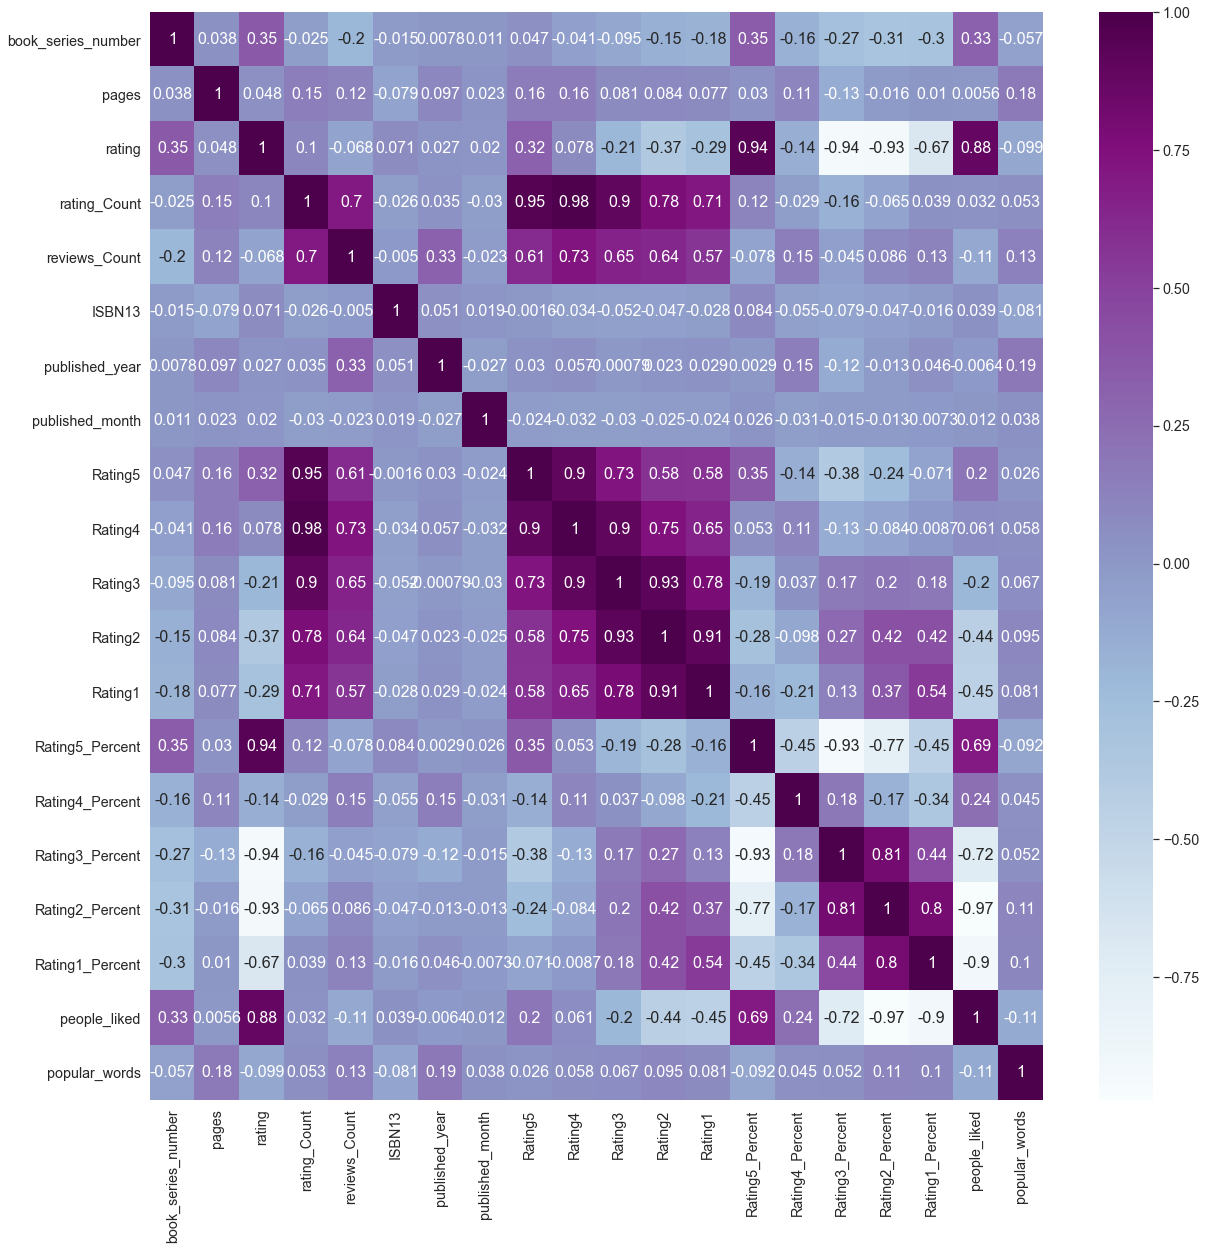

In [17]:
f, ax = plt.subplots(figsize=(20, 20))
corrMatrix = df6.corr() 
sns.heatmap(corrMatrix, annot=True, cmap='BuPu',annot_kws={'fontsize':16})
plt.show()

some small facts:

if "people_liked is higher the more the 'Rating1_Percent' will be lower ,
and will get higher with the Rating percent number(With some deviation).

'rating' is the lowest when the 'Rating3_Percent' is higher and not when 'Rating1_Percent'
do to probably the fact this are the most rated books in the website ,
which is an indicate to them having relative high rating.


